In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"


Mounted at ./drive


In [ ]:
from google.colab import drive
from os.path import join
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

drive.mount('/content/drive')
fname = "spaceship_train.csv"
dtrain = pd.read_csv(join(path_prefix, fname))
dtrain.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:

# Assuming you have a DataFrame named 'dtrain' with a column named 'HomePlanets' containing planet names

# Get the value counts of the 'HomePlanets' column
planet_counts = dtrain['HomePlanet'].value_counts()

# Calculate the percentage of occurrence
percentage = planet_counts / len(dtrain) * 100

# Iterate over the unique values and print them with their percentage of occurrence
for planet, count in zip(planet_counts.index, planet_counts):
    print(f'{planet}: {count} occurrences ({percentage[planet]:.2f}%)')


Earth: 4602 occurrences (52.94%)
Europa: 2131 occurrences (24.51%)
Mars: 1759 occurrences (20.23%)


In [ ]:


# Split 'Name' column into 'Firstname' and 'Lastname'
dtrain['Firstname'] = dtrain['Name'].str.split().str[0]
dtrain['Lastname'] = dtrain['Name'].str.split().str[-1]

# Replace missing values with 'Other'
dtrain['Firstname'].fillna('Other', inplace=True)
dtrain['Lastname'].fillna('Other', inplace=True)


In [ ]:

# Get the value counts of the 'HomePlanets' column
planet_counts = dtrain['Lastname'].value_counts()

# Calculate the percentage of occurrence
percentage = planet_counts / len(dtrain) * 100

# Iterate over the unique values and print them with their percentage of occurrence
for planet, count in zip(planet_counts.index, planet_counts):
    print(f'{planet}: {count} occurrences ({percentage[planet]:.2f}%)')

Other: 200 occurrences (2.30%)
Casonston: 18 occurrences (0.21%)
Oneiles: 16 occurrences (0.18%)
Domington: 15 occurrences (0.17%)
Litthews: 15 occurrences (0.17%)
Cartez: 14 occurrences (0.16%)
Browlerson: 14 occurrences (0.16%)
Garnes: 14 occurrences (0.16%)
Fulloydez: 14 occurrences (0.16%)
Hinglendez: 13 occurrences (0.15%)
Briggston: 13 occurrences (0.15%)
Barbes: 13 occurrences (0.15%)
Moodman: 13 occurrences (0.15%)
Gibbsonton: 13 occurrences (0.15%)
Distured: 13 occurrences (0.15%)
Vandan: 12 occurrences (0.14%)
Fowlesterez: 12 occurrences (0.14%)
Loway: 12 occurrences (0.14%)
Vloaf: 12 occurrences (0.14%)
Gainney: 12 occurrences (0.14%)
Hanner: 12 occurrences (0.14%)
Georgasey: 12 occurrences (0.14%)
Wagnerray: 11 occurrences (0.13%)
Cofferson: 11 occurrences (0.13%)
Jenson: 11 occurrences (0.13%)
Gouldensen: 11 occurrences (0.13%)
Morelly: 11 occurrences (0.13%)
Fryersonis: 11 occurrences (0.13%)
Ingston: 11 occurrences (0.13%)
Mosteraked: 11 occurrences (0.13%)
Torrez: 11 oc

In [ ]:
import pandas as pd

# Assuming dtrain is a DataFrame with a 'Lastname' column

# Get the value counts of the 'Lastname' column
lastname_counts = dtrain['Lastname'].value_counts()

# Create an empty 2D array to store the names and occurrences
name_occurrences = []

# Iterate over the unique values and append them to the 2D array
for lastname, count in zip(lastname_counts.index, lastname_counts):
    name_occurrences.append([lastname, count])

# Print the 2D array
for name_occurrence in name_occurrences:
    print(name_occurrence)


['Other', 200]
['Casonston', 18]
['Oneiles', 16]
['Domington', 15]
['Litthews', 15]
['Cartez', 14]
['Browlerson', 14]
['Garnes', 14]
['Fulloydez', 14]
['Hinglendez', 13]
['Briggston', 13]
['Barbes', 13]
['Moodman', 13]
['Gibbsonton', 13]
['Distured', 13]
['Vandan', 12]
['Fowlesterez', 12]
['Loway', 12]
['Vloaf', 12]
['Gainney', 12]
['Hanner', 12]
['Georgasey', 12]
['Wagnerray', 11]
['Cofferson', 11]
['Jenson', 11]
['Gouldensen', 11]
['Morelly', 11]
['Fryersonis', 11]
['Ingston', 11]
['Mosteraked', 11]
['Torrez', 11]
['Buckentry', 11]
['Chanan', 11]
['Crité', 11]
['Pirejus', 11]
['Villenson', 11]
['Ousious', 11]
['Clugete', 11]
['Kiling', 11]
['Ainserfle', 11]
['Coolerson', 11]
['Fla', 11]
['Clemondsey', 11]
['Belley', 11]
['Yorkland', 11]
['Guerson', 11]
['Willy', 11]
['Haydenzier', 10]
['Mclardson', 10]
['Wilsoney', 10]
['Minen', 10]
['Navages', 10]
['Wartyson', 10]
['Sageng', 10]
['Sysilstict', 10]
['Josey', 10]
['Braymon', 10]
['Rilley', 10]
['Fone', 10]
['Pread', 10]
['Birt', 10]
[

In [ ]:
# Create an empty array to store names with occurrences more than 1
names_with_occurrence_more_than_1 = []

# Iterate over the name_occurrences array
for name_occurrence in name_occurrences:
    # Check if the occurrence is more than 1
    if name_occurrence[1] > 1:
        # Append the name to the new array
        names_with_occurrence_more_than_1.append(name_occurrence[0])

# Print the new array
print(names_with_occurrence_more_than_1)


['Other', 'Casonston', 'Oneiles', 'Domington', 'Litthews', 'Cartez', 'Browlerson', 'Garnes', 'Fulloydez', 'Hinglendez', 'Briggston', 'Barbes', 'Moodman', 'Gibbsonton', 'Distured', 'Vandan', 'Fowlesterez', 'Loway', 'Vloaf', 'Gainney', 'Hanner', 'Georgasey', 'Wagnerray', 'Cofferson', 'Jenson', 'Gouldensen', 'Morelly', 'Fryersonis', 'Ingston', 'Mosteraked', 'Torrez', 'Buckentry', 'Chanan', 'Crité', 'Pirejus', 'Villenson', 'Ousious', 'Clugete', 'Kiling', 'Ainserfle', 'Coolerson', 'Fla', 'Clemondsey', 'Belley', 'Yorkland', 'Guerson', 'Willy', 'Haydenzier', 'Mclardson', 'Wilsoney', 'Minen', 'Navages', 'Wartyson', 'Sageng', 'Sysilstict', 'Josey', 'Braymon', 'Rilley', 'Fone', 'Pread', 'Birt', 'Gainebergan', 'Santry', 'Woody', 'Lopelases', 'Moodsey', 'Pittler', 'Serry', 'Mckinsond', 'Booneid', 'Tranciams', 'Meake', 'Vincenton', 'Dal', 'Powery', 'Cardner', 'Openduave', 'Potters', 'Platch', 'Castannison', 'Lowelliott', 'Ewiseston', 'Quart', 'Flemaney', 'Hubbarrison', 'Pollarkeeks', 'Webstephrey',

In [ ]:
dtrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Firstname,Lastname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre


In [ ]:
# Remove 'Other' element from the array
names_with_occurrence_more_than_1 = [name for name in names_with_occurrence_more_than_1 if name != 'Other']
# Create an empty array to store the results
result_array = []


# Create a new column 'family' with default values of 0
dtrain['family'] = 0

# Iterate over the rows in the DataFrame
for index, row in dtrain.iterrows():
    # Check if the lastname is in the names_with_occurrence_more_than_1 list
    if row['Lastname'] in names_with_occurrence_more_than_1:
        # Set the 'family' column value to 1 if the lastname is found
        dtrain.at[index, 'family'] = 1

# Print the updated DataFrame
print(dtrain)



     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [ ]:
# Get the value counts of the 'Destination' column
destination_counts = dtrain['Destination'].value_counts()

# Calculate the percentage of occurrence
percentage = destination_counts / len(dtrain) * 100

# Iterate over the unique values and print them with their percentage of occurrence
for destination, count in zip(destination_counts.index, destination_counts):
    print(f'{destination}: {count} occurrences ({percentage[destination]:.2f}%)')


TRAPPIST-1e: 5915 occurrences (68.04%)
55 Cancri e: 1800 occurrences (20.71%)
PSO J318.5-22: 796 occurrences (9.16%)


In [ ]:

# Assuming you have a DataFrame named 'dtrain' with a column named 'HomePlanets' containing planet names

# Get the value counts of the 'HomePlanets' column
planet_counts = dtrain['HomePlanet'].value_counts()

# Calculate the percentage of occurrence
percentage = planet_counts / len(dtrain) * 100

# Iterate over the unique values and print them with their percentage of occurrence
for planet, count in zip(planet_counts.index, planet_counts):
    print(f'{planet}: {count} occurrences ({percentage[planet]:.2f}%)')


Earth: 4602 occurrences (52.94%)
Europa: 2131 occurrences (24.51%)
Mars: 1759 occurrences (20.23%)


In [ ]:
drive.mount('/content/drive')
fname = "spaceship_test.csv"
dtest = pd.read_csv(join(path_prefix, fname))

dtest.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(4277, 13)

In [ ]:
split_data = dtrain['Cabin'].str.split('/', n=2, expand=True)
dtrain['Deck'] = split_data[0]
dtrain['Side'] = split_data[2]

ordinal_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
dtrain['Deck'] = dtrain['Deck'].map(ordinal_mapping).fillna(8).astype(float)

ordinal_mapping = {'P': 1, 'S': 2}
dtrain['Side'] = dtrain['Side'].map(ordinal_mapping).fillna(3).astype(float)
dtrain['HomePlanet'] = dtrain['HomePlanet'].map({'Earth': 1, 'Europa': 2,'Mars':3}).fillna(4).astype(float)


dtrain['Destination'] = dtrain['Destination'].map({'TRAPPIST-1e': 1, '55 Cancri e': 2,'PSO J318.5-22':3}).fillna(4).astype(int)


most_frequent_value = dtrain['CryoSleep'].mode()[0]
dtrain['CryoSleep'].fillna(most_frequent_value, inplace=True)
dtrain['CryoSleep'] = dtrain['CryoSleep'].astype(float)

most_frequent_value = dtrain['VIP'].mode()[0]
dtrain['VIP'].fillna(most_frequent_value, inplace=True)
dtrain['VIP'] = dtrain['VIP'].astype(float)

###############

columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in columns_to_fill:
    most_frequent_value = dtrain[column].mode()[0]
    dtrain[column].fillna(most_frequent_value, inplace=True)





dtrain['Transported'] = dtrain['Transported'].astype(float)

dtrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Firstname,Lastname,family,Deck,Side
0,0001_01,2.0,0.0,B/0/P,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,Maham,Ofracculy,0,2.0,1.0
1,0002_01,1.0,0.0,F/0/S,1,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,Juanna,Vines,1,6.0,2.0
2,0003_01,2.0,0.0,A/0/S,1,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,Altark,Susent,1,1.0,2.0
3,0003_02,2.0,0.0,A/0/S,1,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,Solam,Susent,1,1.0,2.0
4,0004_01,1.0,0.0,F/1/S,1,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,Willy,Santantines,1,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2.0,0.0,A/98/P,2,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0.0,Gravior,Noxnuther,1,1.0,1.0
8689,9278_01,1.0,1.0,G/1499/S,3,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0.0,Kurta,Mondalley,1,7.0,2.0
8690,9279_01,1.0,0.0,G/1500/S,1,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1.0,Fayey,Connon,1,7.0,2.0
8691,9280_01,2.0,0.0,E/608/S,2,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0.0,Celeon,Hontichre,1,5.0,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns that need to be standardized
numeric_columns = ['FoodCourt', 'ShoppingMall', 'Age','Spa','VRDeck','RoomService']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standardization to the selected numeric columns
dtrain[numeric_columns] = scaler.fit_transform(dtrain[numeric_columns])


dtrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Firstname,Lastname,family,Deck,Side
0,0001_01,2.0,0.0,B/0/P,1,0.715553,0.0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,Maham Ofracculy,0.0,Maham,Ofracculy,0,2.0,1.0
1,0002_01,1.0,0.0,F/0/S,1,-0.329408,0.0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,Juanna Vines,1.0,Juanna,Vines,1,6.0,2.0
2,0003_01,2.0,0.0,A/0/S,1,2.039169,1.0,-0.268001,1.959998,-0.283579,5.695623,-0.219796,Altark Susent,0.0,Altark,Susent,1,1.0,2.0
3,0003_02,2.0,0.0,A/0/S,1,0.297569,0.0,-0.333105,0.523010,0.336851,2.687176,-0.092818,Solam Susent,0.0,Solam,Susent,1,1.0,2.0
4,0004_01,1.0,0.0,F/1/S,1,-0.886720,0.0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,Willy Santantines,1.0,Willy,Santantines,1,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2.0,0.0,A/98/P,2,0.854881,1.0,-0.333105,3.992336,-0.283579,1.189173,-0.197751,Gravior Noxnuther,0.0,Gravior,Noxnuther,1,1.0,1.0
8689,9278_01,1.0,1.0,G/1499/S,3,-0.747392,0.0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,Kurta Mondalley,0.0,Kurta,Mondalley,1,7.0,2.0
8690,9279_01,1.0,0.0,G/1500/S,1,-0.190079,0.0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,Fayey Connon,1.0,Fayey,Connon,1,7.0,2.0
8691,9280_01,2.0,0.0,E/608/S,2,0.227905,0.0,-0.333105,0.376365,-0.283579,0.043013,2.589576,Celeon Hontichre,0.0,Celeon,Hontichre,1,5.0,2.0


In [ ]:
dtrain.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Firstname         0
Lastname          0
family            0
Deck              0
Side              0
dtype: int64

In [ ]:
# Create the DataFrame with the specified columns
x = dtrain[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
                               'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'family', 'Deck', 'Side']].values
y=dtrain[['Transported']].values
print(f'shape of x:{x.shape}')
print(f'shape of y:{y.shape}')

shape of x:(8693, 13)
shape of y:(8693, 1)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

# Assuming x and y are your input features and target labels

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def swish(x):
    return x * tf.sigmoid(x)

def requ(x):
  return tf.maximum(0.0, tf.pow(x,3))


#experiminet with activation functions

# Define your model
model = tf.keras.Sequential([
   keras.layers.Dense(640, activation='relu', input_shape=(13,)),

    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(320, activation='relu'),


   keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(x_train, y_train, epochs=2000)
#0.3841 swish
#0.3642 relu
#

Epoch 1/2000
218/218 [==============================] - 12s 37ms/step - loss: 0.4983
Epoch 2/2000
218/218 [==============================] - 8s 35ms/step - loss: 0.4569
Epoch 3/2000
218/218 [==============================] - 9s 41ms/step - loss: 0.4449
Epoch 4/2000
218/218 [==============================] - 4s 19ms/step - loss: 0.4494
Epoch 5/2000
218/218 [==============================] - 4s 20ms/step - loss: 0.4380
Epoch 6/2000
218/218 [==============================] - 5s 25ms/step - loss: 0.4333
Epoch 7/2000
218/218 [==============================] - 4s 19ms/step - loss: 0.4318
Epoch 8/2000
218/218 [==============================] - 4s 19ms/step - loss: 0.4333
Epoch 9/2000
218/218 [==============================] - 6s 26ms/step - loss: 0.4276
Epoch 10/2000
218/218 [==============================] - 4s 19ms/step - loss: 0.4256
Epoch 11/2000
218/218 [==============================] - 4s 19ms/step - loss: 0.4241
Epoch 12/2000
218/218 [==============================] - 6s 25ms/step - l

KeyboardInterrupt: ignored

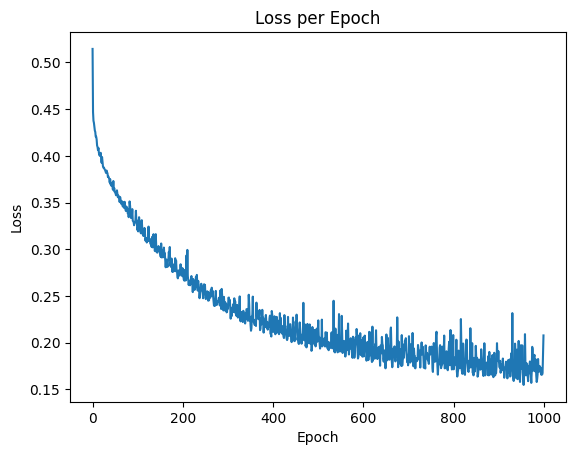

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

loss_values = model.history.history['loss']

# Plotting the loss values
plt.plot(loss_values)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

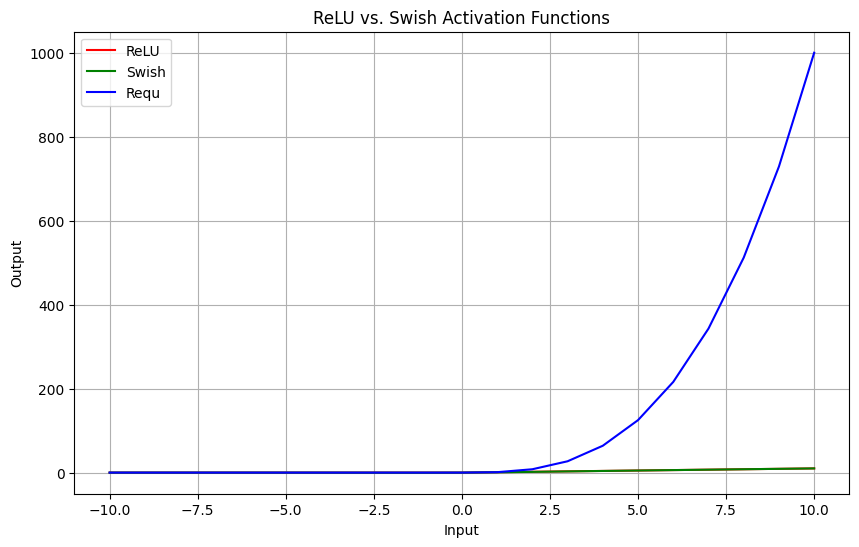

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.arange(-10, 11, 1, dtype=float)

# Define ReLU and Swish activation functions
def relu(x):
    return np.maximum(0, x)

def swish(x):
    return x * sigmoid(x)
def requ(x):
  return np.maximum(0,x**3)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply activation functions to the data
relu_output = relu(data)
swish_output = swish(data)
requ_output = requ(data)

# Plot the data and activation functions
plt.figure(figsize=(10, 6))
#plt.scatter(data, np.zeros_like(data), label='Input Data', color='blue')
plt.plot(data, relu_output, label='ReLU', color='red')
plt.plot(data, swish_output, label='Swish', color='green')
plt.plot(data, requ_output, label='Requ', color='blue')

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU vs. Swish Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


55/55 [==============================] - 0s 4ms/step


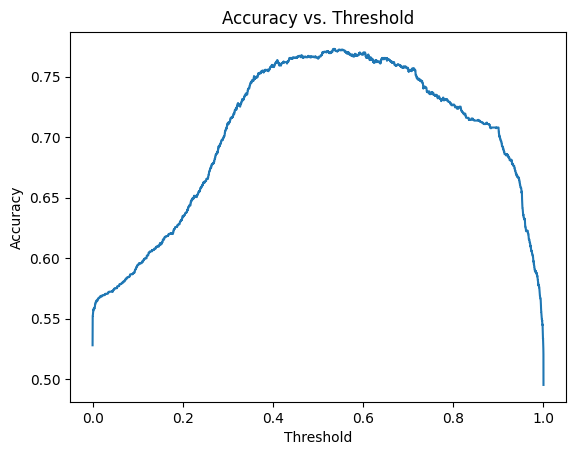

Global Maximum Accuracy: 0.772857964347326
Corresponding Threshold: 0.5338533853385339


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_prob = model.predict(x_test)

# Define an array of thresholds
thresholds = np.linspace(0, 1, num=10000)

# Initialize empty lists for accuracy and global maxima
accuracies = []
global_maxima = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_prediction = np.where(y_pred_prob > threshold, 1, 0)
    accuracy = accuracy_score(y_test, y_prediction)
    accuracies.append(accuracy)

# Find the global maximum accuracy and its corresponding threshold
max_accuracy = max(accuracies)
max_threshold = thresholds[accuracies.index(max_accuracy)]

# Plot the accuracy vs. threshold
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.show()

# Print the global maximum accuracy and its corresponding threshold
print("Global Maximum Accuracy:", max_accuracy)
print("Corresponding Threshold:", max_threshold)


In [ ]:
dtest

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Firstname,Lastname,family,Deck,Side,Transported
0,0013_01,4.0,1.0,G/3/S,4,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Nelly,Carsoning,1,7.0,2.0,1.0
1,0018_01,4.0,0.0,F/4/S,4,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Lerome,Peckers,0,6.0,2.0,0.0
2,0019_01,4.0,1.0,C/0/S,4,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,Sabih,Unhearfus,0,3.0,2.0,1.0
3,0021_01,4.0,0.0,C/1/S,4,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,Meratz,Caltilter,0,3.0,2.0,1.0
4,0023_01,4.0,0.0,F/5/S,4,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,Brence,Harperez,1,6.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,4.0,1.0,G/1496/S,4,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Jeron,Peter,1,7.0,2.0,1.0
4273,9269_01,4.0,0.0,NaN,4,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Matty,Scheron,1,8.0,3.0,1.0
4274,9271_01,4.0,1.0,D/296/P,4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Jayrin,Pore,1,4.0,1.0,1.0
4275,9273_01,4.0,0.0,D/297/P,4,18.0,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Kitakan,Conale,1,4.0,1.0,1.0


In [ ]:
import pandas as pd

# Split 'Name' column into 'Firstname' and 'Lastname'
dtest['Firstname'] = dtest['Name'].str.split().str[0]
dtest['Lastname'] = dtest['Name'].str.split().str[-1]

# Replace missing values with 'Other'
dtest['Firstname'].fillna('Other', inplace=True)
dtest['Lastname'].fillna('Other', inplace=True)

# Get the value counts of the 'HomePlanets' column
planet_counts = dtest['Lastname'].value_counts()

# Calculate the percentage of occurrence
percentage = planet_counts / len(dtest) * 100



# Get the value counts of the 'Lastname' column
lastname_counts = dtest['Lastname'].value_counts()

# Create an empty 2D array to store the names and occurrences
name_occurrences = []

# Iterate over the unique values and append them to the 2D array
for lastname, count in zip(lastname_counts.index, lastname_counts):
    name_occurrences.append([lastname, count])

# Print the 2D array

# Create an empty array to store names with occurrences more than 1
names_with_occurrence_more_than_1 = []

# Iterate over the name_occurrences array
for name_occurrence in name_occurrences:
    # Check if the occurrence is more than 1
    if name_occurrence[1] > 1:
        # Append the name to the new array
        names_with_occurrence_more_than_1.append(name_occurrence[0])



# Remove 'Other' element from the array
names_with_occurrence_more_than_1 = [name for name in names_with_occurrence_more_than_1 if name != 'Other']

# Create an empty array to store the results
result_array = []

# Create a new column 'family' with default values of 0
dtest['family'] = 0

# Iterate over the rows in the DataFrame
for index, row in dtest.iterrows():
    # Check if the lastname is in the names_with_occurrence_more_than_1 list
    if row['Lastname'] in names_with_occurrence_more_than_1:
        # Set the 'family' column value to 1 if the lastname is found
        dtest.at[index, 'family'] = 1


# Assuming you have a DataFrame named 'dtest' with a column named 'HomePlanets' containing planet names

# Get the value counts of the 'HomePlanets' column
planet_counts = dtest['HomePlanet'].value_counts()

# Calculate the percentage of occurrence
percentage = planet_counts / len(dtest) * 100


split_data = dtest['Cabin'].str.split('/', n=2, expand=True)
dtest['Deck'] = split_data[0]
dtest['Side'] = split_data[2]

ordinal_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
dtest['Deck'] = dtest['Deck'].map(ordinal_mapping).fillna(8).astype(float)

ordinal_mapping = {'P': 1, 'S': 2}
dtest['Side'] = dtest['Side'].map(ordinal_mapping).fillna(3).astype(float)
dtest['HomePlanet'] = dtest['HomePlanet'].map({'Earth': 1, 'Europa': 2, 'Mars': 3}).fillna(4).astype(float)

dtest['Destination'] = dtest['Destination'].map({'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3}).fillna(4).astype(int)

most_frequent_value = dtest['CryoSleep'].mode()[0]
dtest['CryoSleep'].fillna(most_frequent_value, inplace=True)
dtest['CryoSleep'] = dtest['CryoSleep'].astype(float)

most_frequent_value = dtest['VIP'].mode()[0]
dtest['VIP'].fillna(most_frequent_value, inplace=True)
dtest['VIP'] = dtest['VIP'].astype(float)

###############

columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in columns_to_fill:
    most_frequent_value = dtest[column].mode()[0]
    dtest[column].fillna(most_frequent_value, inplace=True)



dtest


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Firstname,Lastname,family,Deck,Side
0,0013_01,4.0,1.0,G/3/S,4,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Nelly,Carsoning,1,7.0,2.0
1,0018_01,4.0,0.0,F/4/S,4,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Lerome,Peckers,0,6.0,2.0
2,0019_01,4.0,1.0,C/0/S,4,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,Sabih,Unhearfus,0,3.0,2.0
3,0021_01,4.0,0.0,C/1/S,4,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,Meratz,Caltilter,0,3.0,2.0
4,0023_01,4.0,0.0,F/5/S,4,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,Brence,Harperez,1,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,4.0,1.0,G/1496/S,4,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Jeron,Peter,1,7.0,2.0
4273,9269_01,4.0,0.0,NaN,4,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Matty,Scheron,1,8.0,3.0
4274,9271_01,4.0,1.0,D/296/P,4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Jayrin,Pore,1,4.0,1.0
4275,9273_01,4.0,0.0,D/297/P,4,18.0,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Kitakan,Conale,1,4.0,1.0


In [ ]:
# Create the DataFrame with the specified columns
xtesting = dtest[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
                               'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'family', 'Deck', 'Side']].values

print(f'shape of x:{xtesting.shape}')


shape of x:(4277, 13)


In [ ]:
y_predicted_for_test = model.predict(x)

134/134 [==============================] - 1s 6ms/step


In [ ]:
y_predicted_for_test

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a NumPy array named 'predictions' and a Pandas DataFrame named 'dtest'

# Convert the NumPy array to a Pandas Series
transported_values = pd.Series(y_predicted_for_test.flatten(), name='Transported')

# Add the Series as a new column to the 'dtest' DataFrame
dtest['Transported'] = transported_values

# Print the updated DataFrame
dtest


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Firstname,Lastname,family,Deck,Side,Transported
0,0013_01,4.0,1.0,G/3/S,4,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Nelly,Carsoning,1,7.0,2.0,1.0
1,0018_01,4.0,0.0,F/4/S,4,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Lerome,Peckers,0,6.0,2.0,0.0
2,0019_01,4.0,1.0,C/0/S,4,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,Sabih,Unhearfus,0,3.0,2.0,1.0
3,0021_01,4.0,0.0,C/1/S,4,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,Meratz,Caltilter,0,3.0,2.0,1.0
4,0023_01,4.0,0.0,F/5/S,4,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,Brence,Harperez,1,6.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,4.0,1.0,G/1496/S,4,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Jeron,Peter,1,7.0,2.0,1.0
4273,9269_01,4.0,0.0,NaN,4,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Matty,Scheron,1,8.0,3.0,1.0
4274,9271_01,4.0,1.0,D/296/P,4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Jayrin,Pore,1,4.0,1.0,1.0
4275,9273_01,4.0,0.0,D/297/P,4,18.0,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Kitakan,Conale,1,4.0,1.0,1.0


In [ ]:
dtest.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,family,Deck,Side,Transported
count,4277.0,4277.000000,4277.0,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,4.0,0.361001,4.0,28.431377,0.017302,215.062427,428.592238,173.233107,295.895955,304.898293,0.830956,5.415478,1.536123,0.590127
std,0.0,0.480347,0.0,14.111469,0.130409,601.914503,1510.155974,554.991776,1104.872018,1235.991811,0.374834,1.746083,0.543623,0.491296
min,4.0,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,4.0,0.000000,4.0,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000
50%,4.0,0.000000,4.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2.000000,1.000000
75%,4.0,1.000000,4.0,37.000000,0.000000,48.000000,66.000000,27.000000,43.000000,31.000000,1.000000,7.000000,2.000000,1.000000
max,4.0,1.000000,4.0,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,1.000000,8.000000,3.000000,1.000000


In [ ]:
dfinal = dtest[['PassengerId','Transported']]
dfinal

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,1.0
...,...,...
4272,9266_02,1.0
4273,9269_01,1.0
4274,9271_01,1.0
4275,9273_01,1.0


In [ ]:
dfinal['Transported'] = dfinal['Transported'].astype(bool)
dfinal['Transported'].describe()
import pandas as pd

# Assuming you have a DataFrame named 'df' and you want to convert the boolean column 'ColumnName' to strings

# Convert the boolean column to strings
dfinal['Transported'] = dfinal['Transported'].astype(str)

# Replace 'True' and 'False' strings with 'true' and 'false'
dfinal['Transported'] = dfinal['Transported'].str.replace('true', 'True').replace('false', 'False')

# Print the updated DataFrame
dfinal.describe()


<ipython-input-126-e5e1db732f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinal['Transported'] = dfinal['Transported'].astype(bool)
<ipython-input-126-e5e1db732f55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinal['Transported'] = dfinal['Transported'].astype(str)
<ipython-input-126-e5e1db732f55>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,PassengerId,Transported
count,4277,4277
unique,4277,2
top,0013_01,True
freq,1,2651


In [ ]:
dfinal

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [ ]:
import os


# Assuming you have a DataFrame named 'df' with an index column and two main columns 'Column1' and 'Column2'

# Select the two main columns and save to CSV
dfinal[['PassengerId', 'Transported']].to_csv('dfinal_titanic_spaceship2.csv', index=False)

print("DataFrame saved as CSV successfully.")


DataFrame saved as CSV successfully.
